## Problmem 1

(a) Theoretical properties of OLS estimators $\hat{\alpha}$ and $\hat{\beta}$

(b c d) Simulation, Plot and Comparasion

In [25]:
import numpy as np 
import pandas as pd
def sample():
    N = 50
    alpha = 1
    beta = 1
    rou_ex = 0
    sigma_e = 1
    sigma_x = 1
    x = np.random.randn(N)
    e = np.random.randn(N)
    y = alpha + beta * x + e
    xbar = sum(x)/len(x)
    ybar = sum(y)/len(y)
    Sxx = sum((x-xbar)**2)
    Syy = sum((y-ybar)**2)
    Sxy = sum((y-ybar)*(x-xbar))

    beta_hat_simulation  = Sxy/Sxx
    alpha_hat_simulation = 1/N * sum(y) - (1/N * sum(x)) * beta_hat_simulation
    
    beta_stderror = (1/(N-2)*sum(e**2)/Sxx)**0.5
    alpha_stderror = beta_stderror * (1/N*sum(x**2))**0.5
    
    beta_miu = alpha - xbar * rou_ex *sigma_e/sigma_x
    alpha_miu = beta + rou_ex * sigma_e/sigma_x

    beta_sigma = sigma_e * (1/Sxx)**0.5
    alpha_sigma = sigma_e * (1/N + xbar**2/Sxx)**0.5
    Dict = {
        "alpha_hat_simulation" : alpha_hat_simulation,
        "beta_hat_simulation"  : beta_hat_simulation,
        "alpha_stderror"       : alpha_stderror,
        "beta_stderror"        : beta_stderror,
        "alpha_miu"            : alpha_miu,
        "beta_miu"             : beta_miu,
        "alpha_sigma"          : alpha_sigma,
        "beta_sigma"           : beta_sigma
    }
    return Dict
def get_samples():
    M = 5000
    List = []
    for i in range(M):
        List.append(sample())
    return pd.DataFrame(List)
df = get_samples()

print("=====        df_mean        ======")
print(df.mean())
print("===== df_standard_deviation ======")
print(df.std())

=====        df_mean        ======
alpha_hat_simulation    0.999629
beta_hat_simulation     1.003743
alpha_stderror          0.145056
beta_stderror           0.147396
alpha_miu               1.000000
beta_miu                1.000000
alpha_sigma             0.142873
beta_sigma              0.145182
dtype: float64
===== df_standard_deviation ======
alpha_hat_simulation    0.144410
beta_hat_simulation     0.143227
alpha_stderror          0.014647
beta_stderror           0.021152
alpha_miu               0.000000
beta_miu                0.000000
alpha_sigma             0.002094
beta_sigma              0.014925
dtype: float64


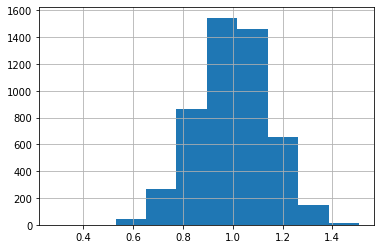

In [28]:
df["alpha_hat_simulation"].hist()

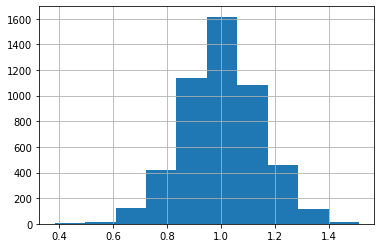

In [29]:
df["beta_hat_simulation"].hist()

In [26]:
Dict1 = {
        "alpha_mean": df["alpha_hat_simulation"].mean(),
        "alpha_std": df["alpha_hat_simulation"].std(),
        "beta_mean": df["beta_hat_simulation"].mean(),
        "beta_std": df["beta_hat_simulation"].std()
        } 
Dict2 = {
        "alpha_mean": df["alpha_miu"].mean(),
        "alpha_std": df["alpha_sigma"].mean(),
        "beta_mean": df["beta_miu"].mean(),
        "beta_std": df["beta_sigma"].mean()
        }
dfnew = pd.DataFrame([Dict1,Dict2],index = ["Simulation","Theory"])
print(dfnew)

            alpha_mean  alpha_std  beta_mean  beta_std
Simulation    0.999629   0.144410   1.003743  0.143227
Theory        1.000000   0.142873   1.000000  0.145182


## Problem 2

In [ ]:
Now, the distribution of x and e are the same, but the corelation coefficient of them are 0.5

In [30]:
import numpy as np 
import pandas as pd
def sample():
    N = 50
    alpha = 1
    beta = 1
    rou_ex = 0.5
    sigma_e = 1
    sigma_x = 1
    x = np.random.randn(N)
    e = np.random.randn(N)
    y = alpha + beta * x + e
    xbar = sum(x)/len(x)
    ybar = sum(y)/len(y)
    Sxx = sum((x-xbar)**2)
    Syy = sum((y-ybar)**2)
    Sxy = sum((y-ybar)*(x-xbar))

    beta_hat_simulation  = Sxy/Sxx
    alpha_hat_simulation = 1/N * sum(y) - (1/N * sum(x)) * beta_hat_simulation
    
    beta_stderror = (1/(N-2)*sum(e**2)/Sxx)**0.5
    alpha_stderror = beta_stderror * (1/N*sum(x**2))**0.5
    
    beta_miu = alpha - xbar * rou_ex *sigma_e/sigma_x
    alpha_miu = beta + rou_ex * sigma_e/sigma_x

    beta_sigma = sigma_e * (1/Sxx)**0.5
    alpha_sigma = sigma_e * (1/N + xbar**2/Sxx)**0.5
    Dict = {
        "alpha_hat_simulation" : alpha_hat_simulation,
        "beta_hat_simulation"  : beta_hat_simulation,
        "alpha_stderror"       : alpha_stderror,
        "beta_stderror"        : beta_stderror,
        "alpha_miu"            : alpha_miu,
        "beta_miu"             : beta_miu,
        "alpha_sigma"          : alpha_sigma,
        "beta_sigma"           : beta_sigma
    }
    return Dict
def get_samples():
    M = 5000
    List = []
    for i in range(M):
        List.append(sample())
    return pd.DataFrame(List)
df = get_samples()

print("=====        df_mean        ======")
print(df.mean())
print("===== df_standard_deviation ======")
print(df.std())

=====        df_mean        ======
alpha_hat_simulation    1.000880
beta_hat_simulation     0.998942
alpha_stderror          0.144827
beta_stderror           0.146797
alpha_miu               1.500000
beta_miu                1.001171
alpha_sigma             0.142950
beta_sigma              0.144932
dtype: float64
===== df_standard_deviation ======
alpha_hat_simulation    0.143208
beta_hat_simulation     0.145493
alpha_stderror          0.014765
beta_stderror           0.020919
alpha_miu               0.000000
beta_miu                0.072005
alpha_sigma             0.002156
beta_sigma              0.014818
dtype: float64


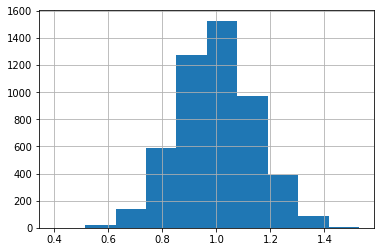

In [31]:
df["alpha_hat_simulation"].hist()

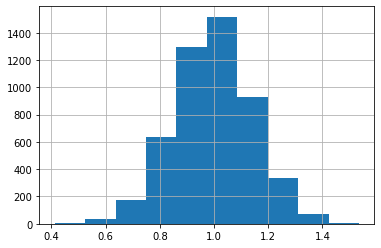

In [32]:
df["beta_hat_simulation"].hist()

In [33]:
Dict1 = {
        "alpha_mean": df["alpha_hat_simulation"].mean(),
        "alpha_std": df["alpha_hat_simulation"].std(),
        "beta_mean": df["beta_hat_simulation"].mean(),
        "beta_std": df["beta_hat_simulation"].std()
        } 
Dict2 = {
        "alpha_mean": df["alpha_miu"].mean(),
        "alpha_std": df["alpha_sigma"].mean(),
        "beta_mean": df["beta_miu"].mean(),
        "beta_std": df["beta_sigma"].mean()
        }
dfnew = pd.DataFrame([Dict1,Dict2],index = ["Simulation","Theory"])
print(dfnew)

            alpha_mean  alpha_std  beta_mean  beta_std
Simulation     1.00088   0.143208   0.998942  0.145493
Theory         1.50000   0.142950   1.001171  0.144932


## Problem 3

In [34]:
import numpy as np 
import pandas as pd
def sample():
    N = 50
    alpha = 1
    beta = 1
    t = 5
    x = np.random.standard_t(t,N)
    e = np.random.standard_t(t,N)
    y = alpha + beta * x + e
    xbar = sum(x)/len(x)
    ybar = sum(y)/len(y)
    Sxx = sum((x-xbar)**2)
    Syy = sum((y-ybar)**2)
    Sxy = sum((y-ybar)*(x-xbar))

    beta_hat_simulation  = Sxy/Sxx
    alpha_hat_simulation = 1/N * sum(y) - (1/N * sum(x)) * beta_hat_simulation
    
    beta_stderror = (1/(N-2)*sum(e**2)/Sxx)**0.5
    alpha_stderror = beta_stderror * (1/N*sum(x**2))**0.5
    
    beta_miu = alpha 
    alpha_miu = beta 

    beta_sigma = (t * (t-2) * 1/Sxx)**0.5
    alpha_sigma = (t * (t-2))**0.5 * (1/N + xbar**2/Sxx)**0.5
    Dict = {
        "alpha_hat_simulation" : alpha_hat_simulation,
        "beta_hat_simulation"  : beta_hat_simulation,
        "alpha_stderror"       : alpha_stderror,
        "beta_stderror"        : beta_stderror,
        "alpha_miu"            : alpha_miu,
        "beta_miu"             : beta_miu,
        "alpha_sigma"          : alpha_sigma,
        "beta_sigma"           : beta_sigma
    }
    return Dict
def get_samples():
    M = 5000
    List = []
    for i in range(M):
        List.append(sample())
    return pd.DataFrame(List)
df = get_samples()

print("=====        df_mean        ======")
print(df.mean())
print("===== df_standard_deviation ======")
print(df.std())

=====        df_mean        ======
alpha_hat_simulation    1.001086
beta_hat_simulation     1.003755
alpha_stderror          0.185785
beta_stderror           0.150100
alpha_miu               1.000000
beta_miu                1.000000
alpha_sigma             0.553514
beta_sigma              0.447002
dtype: float64
===== df_standard_deviation ======
alpha_hat_simulation    0.184114
beta_hat_simulation     0.150605
alpha_stderror          0.032048
beta_stderror           0.035154
alpha_miu               0.000000
beta_miu                0.000000
alpha_sigma             0.008102
beta_sigma              0.068596
dtype: float64


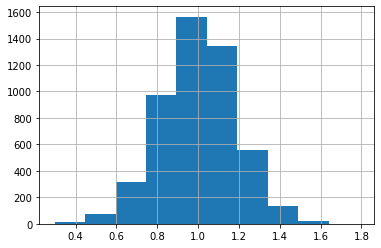

In [35]:
df["alpha_hat_simulation"].hist()

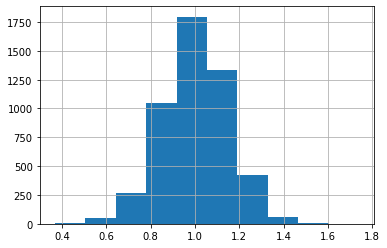

In [36]:
df["beta_hat_simulation"].hist()

In [37]:
Dict1 = {
        "alpha_mean": df["alpha_hat_simulation"].mean(),
        "alpha_std": df["alpha_hat_simulation"].std(),
        "beta_mean": df["beta_hat_simulation"].mean(),
        "beta_std": df["beta_hat_simulation"].std()
        } 
Dict2 = {
        "alpha_mean": df["alpha_miu"].mean(),
        "alpha_std": df["alpha_sigma"].mean(),
        "beta_mean": df["beta_miu"].mean(),
        "beta_std": df["beta_sigma"].mean()
        }
dfnew = pd.DataFrame([Dict1,Dict2],index = ["Simulation","Theory"])
print(dfnew)

            alpha_mean  alpha_std  beta_mean  beta_std
Simulation    1.001086   0.184114   1.003755  0.150605
Theory        1.000000   0.553514   1.000000  0.447002


## Problem 4

In [38]:
import numpy as np 
import pandas as pd
def sample():
    N = 50
    alpha = 1
    beta = 1
    t = 5
    x = np.random.uniform(0,1,N)
    e = np.random.uniform(0,1,N)
    y = alpha + beta * x + e
    xbar = sum(x)/len(x)
    ybar = sum(y)/len(y)
    Sxx = sum((x-xbar)**2)
    Syy = sum((y-ybar)**2)
    Sxy = sum((y-ybar)*(x-xbar))

    beta_hat_simulation  = Sxy/Sxx
    alpha_hat_simulation = 1/N * sum(y) - (1/N * sum(x)) * beta_hat_simulation
    
    beta_stderror = (1/(N-2)*sum(e**2)/Sxx)**0.5
    alpha_stderror = beta_stderror * (1/N*sum(x**2))**0.5
    
    beta_miu = alpha 
    alpha_miu = beta 

    beta_sigma = (t * (t-2) * 1/Sxx)**0.5
    alpha_sigma = (t * (t-2))**0.5 * (1/N + xbar**2/Sxx)**0.5
    Dict = {
        "alpha_hat_simulation" : alpha_hat_simulation,
        "beta_hat_simulation"  : beta_hat_simulation,
        "alpha_stderror"       : alpha_stderror,
        "beta_stderror"        : beta_stderror,
        "alpha_miu"            : alpha_miu,
        "beta_miu"             : beta_miu,
        "alpha_sigma"          : alpha_sigma,
        "beta_sigma"           : beta_sigma
    }
    return Dict
def get_samples():
    M = 5000
    List = []
    for i in range(M):
        List.append(sample())
    return pd.DataFrame(List)
df = get_samples()

print("=====        df_mean        ======")
print(df.mean())
print("===== df_standard_deviation ======")
print(df.std())

=====        df_mean        ======
alpha_hat_simulation    1.500281
beta_hat_simulation     0.999753
alpha_stderror          0.168208
beta_stderror           0.292347
alpha_miu               1.000000
beta_miu                1.000000
alpha_sigma             1.107218
beta_sigma              1.924476
dtype: float64
===== df_standard_deviation ======
alpha_hat_simulation    0.082481
beta_hat_simulation     0.144509
alpha_stderror          0.017235
beta_stderror           0.026965
alpha_miu               0.000000
beta_miu                0.000000
alpha_sigma             0.087157
beta_sigma              0.127263
dtype: float64


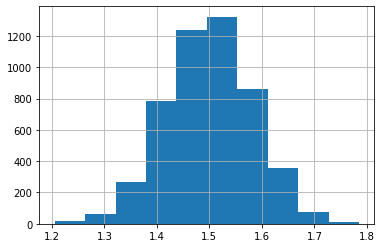

In [39]:
df["alpha_hat_simulation"].hist()

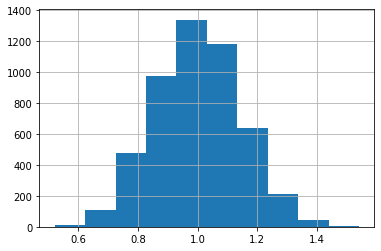

In [40]:
df["beta_hat_simulation"].hist()

In [41]:
Dict1 = {
        "alpha_mean": df["alpha_hat_simulation"].mean(),
        "alpha_std": df["alpha_hat_simulation"].std(),
        "beta_mean": df["beta_hat_simulation"].mean(),
        "beta_std": df["beta_hat_simulation"].std()
        } 
Dict2 = {
        "alpha_mean": df["alpha_miu"].mean(),
        "alpha_std": df["alpha_sigma"].mean(),
        "beta_mean": df["beta_miu"].mean(),
        "beta_std": df["beta_sigma"].mean()
        }
dfnew = pd.DataFrame([Dict1,Dict2],index = ["Simulation","Theory"])
print(dfnew)

            alpha_mean  alpha_std  beta_mean  beta_std
Simulation    1.500281   0.082481   0.999753  0.144509
Theory        1.000000   1.107218   1.000000  1.924476


## Problem 5

We use the first problem as an example

In [42]:
import numpy as np 
import pandas as pd
def sample(N):
    alpha = 1
    beta = 1
    rou_ex = 0
    sigma_e = 1
    sigma_x = 1
    x = np.random.randn(N)
    e = np.random.randn(N)
    y = alpha + beta * x + e
    xbar = sum(x)/len(x)
    ybar = sum(y)/len(y)
    Sxx = sum((x-xbar)**2)
    Syy = sum((y-ybar)**2)
    Sxy = sum((y-ybar)*(x-xbar))

    beta_hat_simulation  = Sxy/Sxx
    alpha_hat_simulation = 1/N * sum(y) - (1/N * sum(x)) * beta_hat_simulation
    
    beta_stderror = (1/(N-2)*sum(e**2)/Sxx)**0.5
    alpha_stderror = beta_stderror * (1/N*sum(x**2))**0.5
    
    beta_miu = alpha - xbar * rou_ex *sigma_e/sigma_x
    alpha_miu = beta + rou_ex * sigma_e/sigma_x

    beta_sigma = sigma_e * (1/Sxx)**0.5
    alpha_sigma = sigma_e * (1/N + xbar**2/Sxx)**0.5
    Dict = {
        "alpha_hat_simulation" : alpha_hat_simulation,
        "beta_hat_simulation"  : beta_hat_simulation,
        "alpha_stderror"       : alpha_stderror,
        "beta_stderror"        : beta_stderror,
        "alpha_miu"            : alpha_miu,
        "beta_miu"             : beta_miu,
        "alpha_sigma"          : alpha_sigma,
        "beta_sigma"           : beta_sigma
    }
    return Dict

def get_samples(N):
    M = 5000
    List = []
    for i in range(M):
        List.append(sample(N))
    return pd.DataFrame(List)

def campare(N):
    df = get_samples(N)
    Dict1 = {
            "alpha_mean": df["alpha_hat_simulation"].mean(),
            "alpha_std": df["alpha_hat_simulation"].std(),
            "beta_mean": df["beta_hat_simulation"].mean(),
            "beta_std": df["beta_hat_simulation"].std()
            } 
    Dict2 = {
            "alpha_mean": df["alpha_miu"].mean(),
            "alpha_std": df["alpha_sigma"].mean(),
            "beta_mean": df["beta_miu"].mean(),
            "beta_std": df["beta_sigma"].mean()
            }
    dfnew = pd.DataFrame([Dict1,Dict2],index = ["Simulation","Theory"])
    print(dfnew)

In [43]:
campare(N = 50)

            alpha_mean  alpha_std  beta_mean  beta_std
Simulation    1.000604   0.143711   1.000219  0.146027
Theory        1.000000   0.142884   1.000000  0.145075


In [44]:
campare(N = 100)

            alpha_mean  alpha_std  beta_mean  beta_std
Simulation    0.999368   0.099928   1.001119  0.101541
Theory        1.000000   0.100487   1.000000  0.101174


In [45]:
campare(N = 500)

            alpha_mean  alpha_std  beta_mean  beta_std
Simulation    0.999462   0.045489   0.999689  0.045046
Theory        1.000000   0.044766   1.000000  0.044847


In [46]:
campare(N = 1000)

            alpha_mean  alpha_std  beta_mean  beta_std
Simulation    1.000691   0.031649    0.99962  0.031411
Theory        1.000000   0.031639    1.00000  0.031671


As N goes larger, the precision of the OLS estimator becomes better, especially the standard deviation.